In [8]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
%matplotlib inline

In [3]:
plt.style.use('court.mplstyle')

# Convenience Functions

In [4]:
def load_profile(profile_number, logs_dir):
    prof = pd.read_table(
        os.path.join(logs_dir, 'profile' + str(profile_number) + '.data'), 
        skiprows=5, sep='\s+')
    return prof

In [5]:
def get_index(logs_dir):
    return pd.read_table(os.path.join(logs_dir, 'profiles.index'), 
        names=['model_number', 'priority', 'profile_number'],
        skiprows=1, sep='\s+')

In [11]:
def load_history_file(logs_dir):
    return pd.read_table(os.path.join(logs_dir, 'history.data'),
                         skiprows=5, sep='\s+')

# Comparing adding the atmosphere

In [9]:
atm_logs_dir = os.path.join('/Users/ccra8514/Desktop/highmassRG_test/w_atm/', 'LOGS')
atm_logs_dir

'/Users/ccra8514/Desktop/highmassRG_test/w_atm/LOGS'

In [27]:
atm_hist = load_history_file(atm_logs_dir)
atm_hist = atm_hist[atm_hist['star_age']>1e4]
atm_hist

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,surface_c12,surface_o16,total_mass_h1,total_mass_he4,rel_E_err,log_rel_E_err,log_rel_run_E_err,num_retries,num_iters,num_solver_iterations
11,110,599,2.294091e+04,3.466822,4.999994,33.997475,-9.762731,0.0,1.000000,0.259666,...,0.003447,0.009359,3.499996,1.399849,3.376853e-13,-12.471488,-10.596576,0,5,5
12,120,615,6.881936e+04,3.824968,4.999989,33.997475,-10.090899,0.0,1.000000,0.563617,...,0.003447,0.009359,3.499992,1.399848,3.102699e-13,-12.508260,-10.692187,0,5,5
13,130,624,1.613091e+05,4.115196,4.999983,33.997474,-10.289825,0.0,1.000000,0.862686,...,0.003447,0.009359,3.499988,1.399846,2.677251e-13,-12.572311,-10.784148,0,6,6
14,140,630,2.842865e+05,4.072530,4.999976,33.997474,-10.181001,0.0,1.000000,0.996270,...,0.003447,0.009359,3.499983,1.399844,2.458704e-13,-12.609294,-10.871206,0,7,7
15,150,703,4.053153e+05,4.025657,4.999967,33.997473,-10.054235,0.0,1.000000,1.000000,...,0.003447,0.009359,3.499977,1.399842,2.264903e-13,-12.644950,-10.946614,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,710,1554,1.151319e+08,4.030972,4.944029,33.992587,-10.447230,0.0,0.999935,0.226621,...,0.002208,0.008554,2.597152,1.593293,1.941892e-13,-12.711775,-7.022947,13,7,7
162,720,1603,1.152104e+08,3.782440,4.944024,33.992586,-9.914280,0.0,0.999874,0.222703,...,0.002208,0.008554,2.597148,1.557452,2.692115e-13,-12.569906,-7.088664,13,8,8
163,730,1622,1.152576e+08,3.582905,4.944014,33.992586,-9.520149,0.0,0.999795,0.220618,...,0.002208,0.008554,2.597141,1.530456,2.238242e-13,-12.650093,-7.147207,13,8,8
164,740,1668,1.152887e+08,3.413419,4.944000,33.992584,-9.250635,0.0,0.999723,0.210059,...,0.002208,0.008554,2.597132,1.509595,2.098361e-13,-12.678120,-7.197311,13,8,8


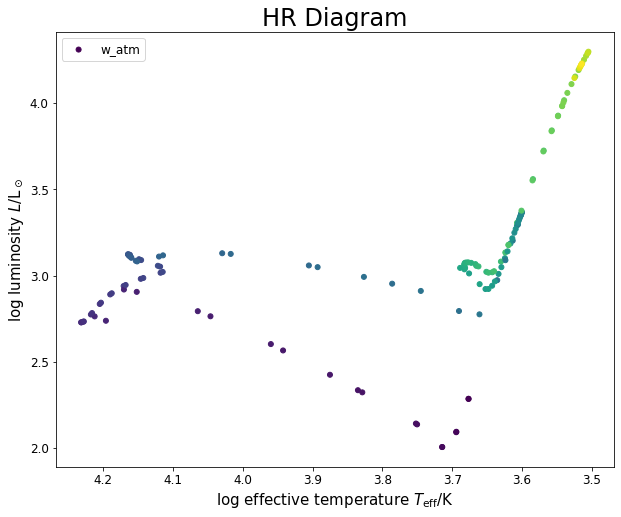

In [40]:
plt.scatter(atm_hist['log_Teff'],#[100:], 
         atm_hist['log_L'],#[100:], 
         lw=1, c=atm_hist['model_number'],cmap='viridis', marker='o', label='w_atm')

plt.gca().invert_xaxis()
plt.xlabel(r'log effective temperature $T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'log luminosity $L/\rm{L}_\odot$')
# plt.xlim(left=5000)

# plt.xscale('log')
# plt.yscale('log')

plt.legend()
plt.title('HR Diagram', size=24)
plt.show()

In [41]:
no_atm_logs_dir = os.path.join('/Users/ccra8514/Desktop/highmassRG_test/no_atm/', 'LOGS')
no_atm_logs_dir

'/Users/ccra8514/Desktop/highmassRG_test/no_atm/LOGS'

In [42]:
no_atm_hist = load_history_file(no_atm_logs_dir)
no_atm_hist = no_atm_hist[no_atm_hist['star_age']>1e4]
no_atm_hist

,model_number,num_zones,star_age,log_dt,star_mass,log_xmstar,log_abs_mdot,mass_conv_core,conv_mx1_top,conv_mx1_bot,...,surface_c12,surface_o16,total_mass_h1,total_mass_he4,rel_E_err,log_rel_E_err,log_rel_run_E_err,num_retries,num_iters,num_solver_iterations
11,110,599,2.294091e+04,3.466822,4.999994,33.997475,-9.762731,0.0,1.000000,0.259666,...,0.003447,0.009359,3.499996,1.399849,3.376853e-13,-12.471488,-10.596576,0,5,5
12,120,615,6.881936e+04,3.824968,4.999989,33.997475,-10.090899,0.0,1.000000,0.563617,...,0.003447,0.009359,3.499992,1.399848,3.102699e-13,-12.508260,-10.692187,0,5,5
13,130,624,1.613091e+05,4.115196,4.999983,33.997474,-10.289825,0.0,1.000000,0.862686,...,0.003447,0.009359,3.499988,1.399846,2.677251e-13,-12.572311,-10.784148,0,6,6
14,140,630,2.842865e+05,4.072530,4.999976,33.997474,-10.181001,0.0,1.000000,0.996270,...,0.003447,0.009359,3.499983,1.399844,2.458704e-13,-12.609294,-10.871206,0,7,7
15,150,703,4.053153e+05,4.025657,4.999967,33.997473,-10.054235,0.0,1.000000,1.000000,...,0.003447,0.009359,3.499977,1.399842,2.264903e-13,-12.644950,-10.946614,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,690,1502,1.151135e+08,4.022890,4.943939,33.992579,-10.424263,0.0,1.000000,0.226497,...,0.002179,0.008556,2.597105,1.590885,3.044344e-13,-12.516506,-7.074802,1,8,8
70,700,1514,1.151905e+08,3.775488,4.943933,33.992579,-9.893709,0.0,1.000000,0.222661,...,0.002169,0.008549,2.597101,1.555348,2.282951e-13,-12.641503,-7.140707,1,8,8
71,710,1553,1.152366e+08,3.571477,4.943924,33.992578,-9.504239,0.0,1.000000,0.220599,...,0.002164,0.008532,2.597094,1.528768,2.063249e-13,-12.685448,-7.198798,1,8,8
72,720,1566,1.152668e+08,3.381155,4.943910,33.992576,-9.240952,0.0,0.999994,0.209363,...,0.002135,0.008414,2.597085,1.508340,2.057934e-13,-12.686569,-7.248125,1,9,9


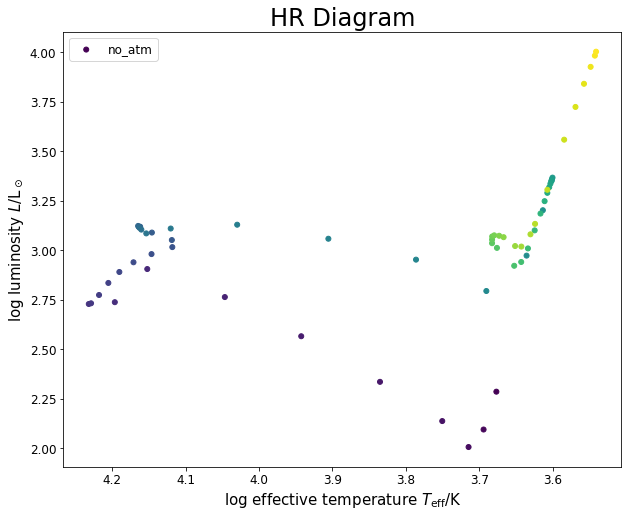

In [43]:
plt.scatter(no_atm_hist['log_Teff'],#[100:], 
         no_atm_hist['log_L'],#[100:], 
         lw=1, c=no_atm_hist['model_number'],cmap='viridis', marker='o', label='no_atm')

plt.gca().invert_xaxis()
plt.xlabel(r'log effective temperature $T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'log luminosity $L/\rm{L}_\odot$')
# plt.xlim(left=5000)

# plt.xscale('log')
# plt.yscale('log')

plt.legend()
plt.title('HR Diagram', size=24)
plt.show()

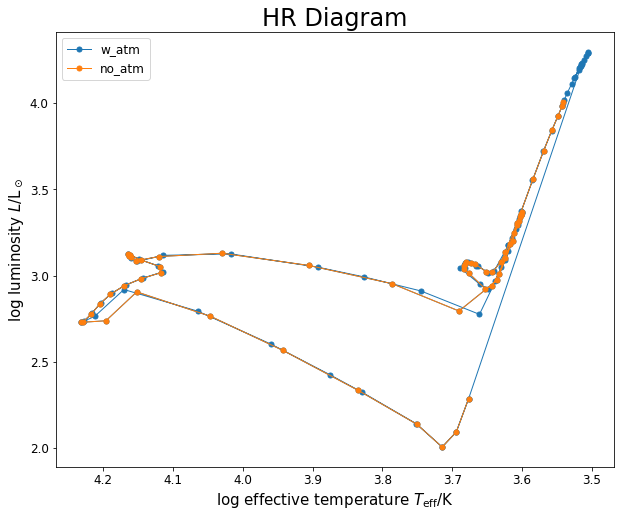

In [50]:
plt.plot(atm_hist['log_Teff'],#[100:], 
         atm_hist['log_L'],#[100:], 
        marker='o', label='w_atm')

plt.plot(no_atm_hist['log_Teff'],#[100:], 
         no_atm_hist['log_L'],#[100:], 
         marker='o', label='no_atm')

plt.gca().invert_xaxis()
plt.xlabel(r'log effective temperature $T_{\rm{eff}}/\rm{K}$')
plt.ylabel(r'log luminosity $L/\rm{L}_\odot$')
# plt.xlim(left=5000)

# plt.xlim(3.7,3.55)
# plt.ylim(2.3,3.5)

plt.legend()
plt.title('HR Diagram', size=24)
plt.show()